__DATA CLEANING PROJECT FOR CONSUMER SURVEY DATA IN KENYA__

__Project Description__

This project was conducted by a local NGO based in Nairobi seeking to understand consumer receptiveness to processed and semi-processed fruits and vegetables such as dried vegetables, dried fruits, processed juice, etc The primary goal of the project was to identify avenues to help reduce post-harvest food loss and waste and hence boost uptake of fruits and vegetables while boosting the income of smallholder farmers engaged in fruits and vegetables farming. Consequently, about 1300 respondents were interviewed via a survey script across various counties in Kenya, and hence the raw data attached as part of this project was obtained.

I obtained the data while working as a consutant to help in data analysis and report writing. The data contains information about the demographics of the respondents, the attitudes of the consumers towards target value chains such as mango juice, process composite porridge flour with dried indigeneous leafy greens (ILGS), reported willingness to pay for such products, and reported weekly and monthly household expenditure on food, fruits, and vegetables.

On this part of the project, I describe the steps I took to clean the data in preparation for data analysis and visualization

As a highlight, I explored the data, fixed typos, removed all empty or duplicated variables, explored the geographic spread and accuracy of the interviews, and created new calculated fields and columns to ready the data for analysis - as described below

In [1]:
#Load required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display

In [2]:
# Check the current working directory
print("Current working directory:", os.getcwd())

# Change the working directory to where the data file is located
os.chdir('C:/Users/moger/Downloads/Data_Cleaning_Project')

# Specify the absolute path to the data file
file_path = 'C:/Users/moger/Downloads/Data_Cleaning_Project/Raw_Data/KAP_Consumer.xlsx'

# Load the raw data
df = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows of the data
display(df.head())


Current working directory: C:\Users\moger\Downloads


,start,end,"We are a team of researchers called Thought Leadership from Jomo Kenyatta University of Agriculture and Technology working together with TechnoServe. Our research is focussed on understanding the demand for specific products in the tomato, mango and indigenous leafy green vegetables value chains. This survey is for scientific use only and it will not be used for commercial purposes. You can answer only upon giving your consent and your identity will remain anonymous and you responses confidential.",Enter a date,Household number,County,Sub County,Location/village name,Record your current location,_Record your current location_latitude,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,2023-12-05 09:44:59.134,2023-12-05 10:05:05.746,NaN,2023-12-05,Mk001,Machakos,Machakos,Mjini,-1.5174292 37.2697919 1617.5 9.464,-1.517429,...,512531283,83377bc7-e0af-4652-8206-db1f83645a55,2023-12-05 07:05:16,NaN,NaN,submitted_via_web,nutintern,vN6xztyyDNTfmCiC2HqiL8,NaN,1
1,2023-12-05 09:40:57.137,2023-12-05 10:24:53.498,NaN,2023-12-05,4.1.1,Kilifi,Mtwapa,Shimo la tewa,-3.9461317 39.7373272 -7.299999713897705 9.2,-3.946132,...,512538665,68f1ffcc-c1d3-4ddb-b33f-eccfc958bd3e,2023-12-05 07:25:33,NaN,NaN,submitted_via_web,nutintern,vN6xztyyDNTfmCiC2HqiL8,NaN,2
2,2023-12-05 10:11:27.388,2023-12-05 10:26:54.786,NaN,2023-12-05,Mk002,Machakos,Machakos,Mjini,-1.5173614 37.2698022 1613.7000732421875 3.65,-1.517361,...,512539493,9e87b7ca-65be-4715-91d6-d8efeb0105c5,2023-12-05 07:27:09,NaN,NaN,submitted_via_web,nutintern,vN6xztyyDNTfmCiC2HqiL8,NaN,3
3,2023-12-05 09:45:11.581,2023-12-05 10:28:03.366,NaN,2023-12-05,1. Kimani,Kiambu,Kiambu,Ndumberi,-1.1529302 36.8027567 1794.0999755859375 68.4,-1.152930,...,512541968,4665e9de-0ade-4917-a144-04d0f6b69efd,2023-12-05 07:34:00,NaN,NaN,submitted_via_web,nutintern,vN6xztyyDNTfmCiC2HqiL8,NaN,4
4,2023-12-05 09:36:29.953,2023-12-05 10:37:31.551,NaN,2023-12-05,1.1.1,Kilifi,Shimolatewa,Mtomondoni,-3.948003 39.7411254 -6.799999713897705 8.05,-3.948003,...,512546658,db6d200c-c786-417d-873a-05a89cd4c597,2023-12-05 07:44:24,NaN,NaN,submitted_via_web,nutintern,vN6xztyyDNTfmCiC2HqiL8,NaN,5


In [3]:
#Get the shape of the data set
print(df.shape) #has 1282 rows and 349 variables

#check data type for each variable
print("\n Data types for each variable:")
print(df.dtypes)

# Get a concise summary of the DataFrame, including the data types, non-null values, and memory usage
print("\n summary of data frame:")
print(df.info())

(1282, 349)

 Data types for each variable:
start                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      datetime64[ns]
end                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [4]:
#Check for missing values in each column
print("\n Missing values in each column:")
print(df.isnull().sum())
#Create a variable to store columns with all null values, then drop them
null_cols= df.isnull().sum()
columns_to_drop=null_cols[null_cols==len(df)].index.tolist()
df.drop(columns=columns_to_drop,inplace=True)
print(df.shape)#data frame now has 328 variables, down from 349;21 columns dropped


 Missing values in each column:
start                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         0
end                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [5]:
#Export to have a view of how the data now looks
df.to_csv('Clean_Data/clean_v1.csv',index=False)#looks good

In [6]:
#Drop further columns
#Remove the personally identifiable information coulmns and other unnecessary ones from the survey form
df.drop(columns=['Household number','Location/village name','Enumerators name','Highest level (grade) of education attained','_id','_submission_time','_status','_submitted_by'],inplace=True)

#Check columns with more than 90% missing data and delete them
#First, calculate percentage of missing values per column
cols_missing=df.isnull().mean()*100

In [7]:
#Filter out cols with more than 90% misisng
cols_with_high_missing=cols_missing[cols_missing > 90].index.tolist()

#drop such columns
df.drop(columns=cols_with_high_missing,inplace=True)

#Export and see
df.to_csv("Clean_Data/cleanv2.csv",index=False)#Perfect, the data now dropped the columns that were not necessary or had almost all records blank


In [8]:
#Check for typos in text columns such as the county
unique_county=df['County '].unique()
print("unique counties",unique_county)#has typos and errors


unique counties ['Machakos ' 'Kilifi ' 'Kiambu ' 'Kilifi' 'Kiambu' 'Kilifi\n\n' 'Machakos'
 'Nairobi' 'Nairobi ' 'Nariobi' 'Mks' 'Meru' 'kiambu' 'Mombasa' 'Mombasa '
 'Nariobi ' 'Mombasa, ' 'Mks ' 'NAIROBI ' 'Nairobj' 'Mombasa county'
 'Kitui' 'Embu' nan 'Kitui ' 'Kiambu county ' 'kiambu ']


In [9]:
#Define variations of each county typos
county_mapping={
    'Nairobi': ['Nairobi','Nairobi ','Nariobi','Nariobi ','NAIROBI ','Nairobj','NAIROBI'],
    'Mombasa': ['Mombasa,','Mombasa county','Mombasa','Mombasa '],
    'Machakos': ['Machakos ','Machakos','Mks'],
    'Kiambu': ['Kiambu ','Kiambu','kiambu','Kiambu county ','kiambu ','Kiambu county'],
    'Kilifi': ['Kilifi ','Kilifi','Kilifi\n\n'],
    'Kitui': ['Kitui','Kitui '],
    'Embu': ['Embu'],
    'Meru': ['Meru']
}

# Clean column values by stripping leading and trailing whitespace
df['County '] = df['County '].str.strip()
#Replace variations of each county with a single consistent value of each county
for county, variations in county_mapping.items():
    df['County '] = df['County '].replace(variations, county)

#Check if this worked
print (df['County '].unique())#works, now the column has 8 distinct counties

['Machakos' 'Kilifi' 'Kiambu' 'Nairobi' 'Meru' 'Mombasa' 'Kitui' 'Embu'
 nan]


In [10]:
#Check how many records are nas
is_null_counties=df['County '].isna().sum()
print("\n The number of records in the County column that are nas", is_null_counties)#has just 1 record as na, ignore

#Create a new column to group the counties into three categories as Rural, Peri-Urban,Urban
#Create a function to categorize
def county_classifier(county):
    urban_counties=['Nairobi','Mobasa']
    Peri_urban_counties=['Kiambu','Machakos']
    rural_counties=['Kilifi','Meru','Kitui','Embu']
    if county in urban_counties:
        return 'Urban'
    elif county in Peri_urban_counties:
        return 'Peri-Urban'
    elif county in rural_counties:
        return 'Rural'
    else:
        return 'nan'
#Apply function to create new column
df['Urban_Rural']=df['County '].apply(county_classifier)

#Check if it works
print(df['Urban_Rural'].unique())#works fine
#Relocate teh new variable to sit just after the 'Sub County' variable
column_name = 'Urban_Rural'
position = df.columns.get_loc('Sub County') + 1  # Get the index after 'Sub County'
df.insert(position, column_name, df.pop(column_name))
#Export this version of the data
df.to_csv("Clean_Data/clean_v3.csv",index=False)


 The number of records in the County column that are nas 1
['Peri-Urban' 'Rural' 'Urban' 'nan']


After Conducting the cleaning above, next I will do some data quality checks to ascertain the integrity of the data. First, I will explore the time it took to complete the surveys and then later ascertain if the enumerators actually collected tthe data from the said locations -with the help of the latitude and longitude variables

In [11]:
#Conduct some data quality checks
#First, check if all the surveys in the data were completed under the same survey version
print(df['__version__'].unique())#There are three versions of the survey forms

#Group by the version variable to check how many forms were submitted per version
version_counts=df['__version__'].value_counts().reset_index()
version_counts.columns=['Version','Count']
print(version_counts)#About 95% of the data was collected by one version of the survey form-which is pretty okay

['vN6xztyyDNTfmCiC2HqiL8' 'vLuNNQtmXT4q9hdCE2ZQuP'
 'vBBdZLiW6ndghbfHf6iCqb']
                  Version  Count
0  vN6xztyyDNTfmCiC2HqiL8   1213
1  vBBdZLiW6ndghbfHf6iCqb     65
2  vLuNNQtmXT4q9hdCE2ZQuP      4


In [12]:
#Secondly, calculate the time it took to complete each survey and evaluate the distribution
#checj the data type for the start time and end time
time_variables=df[['start','end']]
print(time_variables.dtypes)
#calculate survey duration
df['Survey_duration']=df['end']-df['start']
df['Survey_duration_minutes']=df['Survey_duration'].dt.total_seconds()/60
print(df['Survey_duration_minutes'])

start    datetime64[ns]
end      datetime64[ns]
dtype: object
0        20.110200
1        43.939350
2        15.456633
3        42.863083
4        61.026633
           ...    
1277    208.207450
1278     91.915567
1279     57.663500
1280     32.834683
1281     27.011900
Name: Survey_duration_minutes, Length: 1282, dtype: float64


count     1282.000000
mean       269.425269
std        748.542300
min          7.827450
25%         24.766133
50%         59.666800
75%        375.849658
max      12151.801417
Name: Survey_duration_minutes, dtype: float64


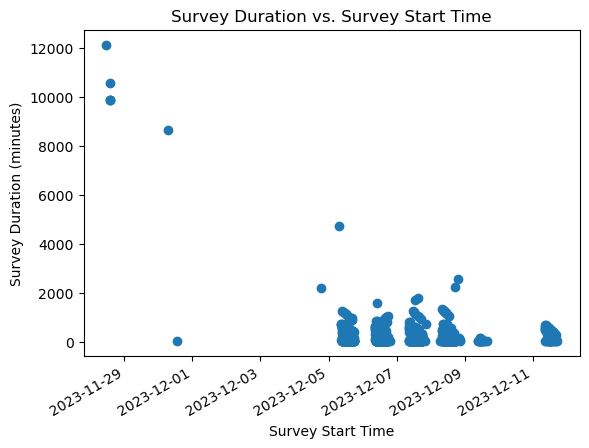

In [13]:
#Explore the summary of survey duration
duration_summary=df['Survey_duration_minutes'].describe()
print(duration_summary)#On average the surveys took about 270 minutes (A bout 4 hours), since the survey was quite long, this could make sense,
#but realistically having to make a respondent sit down with you for 4 hours seems quite unrealistic, unless the interviewer would skip the survey mid-way and return to it when the respondent is more free,
#Or the mean could be biased due to outliers such as the maximum time indicating the survey took 12,152 minutes (very weird)
#But since half of the surveys were completed in 60 minutes/1 hour (as indicated by the 50th percentile, this could make sense.
# Create a scatter plot
plt.scatter(df['start'], df['Survey_duration_minutes'])

# Add title and labels
plt.title('Survey Duration vs. Survey Start Time')
plt.xlabel('Survey Start Time')
plt.ylabel('Survey Duration (minutes)')

# Format x-axis to show time
plt.gcf().autofmt_xdate()  # Rotate and format the x-axis labels for better readability

# Show the plot
plt.show()
#The plot shows that most of the surveys are completed under 2000 minutes,
#And the surveys were done between November 29, 2023 to December 11 2023.

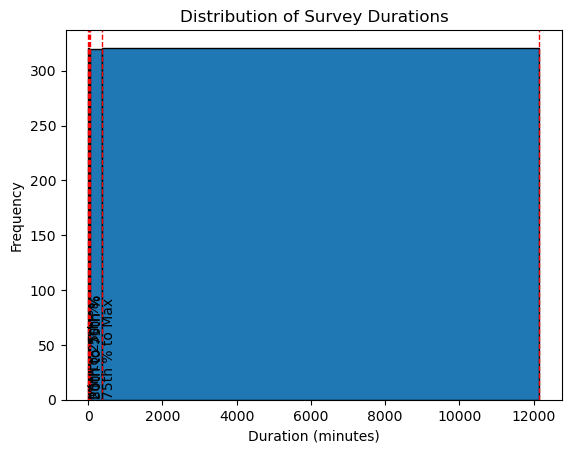

In [14]:
#To help further understand the distribution, create a plot that incorporates the percentiles
# Calculate the percentiles
percentiles = df['Survey_duration_minutes'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()

# Create a histogram with custom bin edges
plt.hist(df['Survey_duration_minutes'], bins=percentiles, edgecolor='black')

# Add lines to show the quartiles
for percentile in percentiles:
    plt.axvline(percentile, color='r', linestyle='dashed', linewidth=1)
    
# Add title and labels
plt.title('Distribution of Survey Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Annotate the quartile regions
plt.text(percentiles[0], 1, 'Min to 25th %', rotation=90, verticalalignment='bottom')
plt.text(percentiles[1], 1, '25th to 50th %', rotation=90, verticalalignment='bottom')
plt.text(percentiles[2], 1, '50th to 75th %', rotation=90, verticalalignment='bottom')
plt.text(percentiles[3], 1, '75th % to Max', rotation=90, verticalalignment='bottom')

# Show the plot
plt.show()
#The plot shows very significant outliers

(1166, 242)


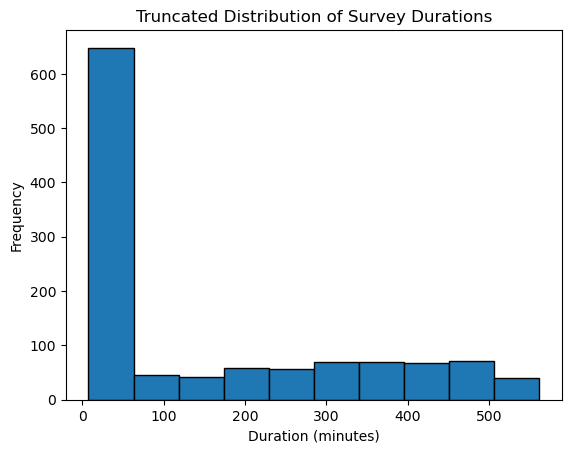

In [15]:
#Try truncate durations more than 1.5*75th percentile, and plot again to see how that looks

# Calculate the 75th percentile
percentile_75 = df['Survey_duration_minutes'].quantile(0.75)

# Truncate data points that are 1.5 times greater than the 75th percentile
df_truncated = df[df['Survey_duration_minutes'] <= 1.5 * percentile_75]
print(df_truncated.shape) #Leads to a loss of 116 records - quite large, but keep this data set as I might use it later to compare if it brings put any better analysis during correlation analysis
# Plot the truncated distribution
#Export this data set to clean folder
df_truncated.to_csv("Clean_Data/clean_v4.csv",index=False)
plt.hist(df_truncated['Survey_duration_minutes'], bins=10, edgecolor='black')

# Add title and labels
plt.title('Truncated Distribution of Survey Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()
#This now looks better, with a majority of the interviews performed under 1 hour as expected.
#The distribution is right-tailed - as it should, more likley to have low duration surveys than high duration surveys

Now, I will conduct some geospatial analysis on the gps variables to help ascertain data quality

In [ ]:
!pip install geopandas


In [16]:
#install necessary packages
!pip install shapely
import geopandas as gpd
from shapely.geometry import Point

CRS of Kenya boundary data: EPSG:4326
Index(['Shape_Leng', 'Shape_Area', 'ADM1_EN', 'ADM1_PCODE', 'ADM1_REF',
       'ADM1ALT1EN', 'ADM1ALT2EN', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn',
       'validTo', 'geometry'],
      dtype='object')


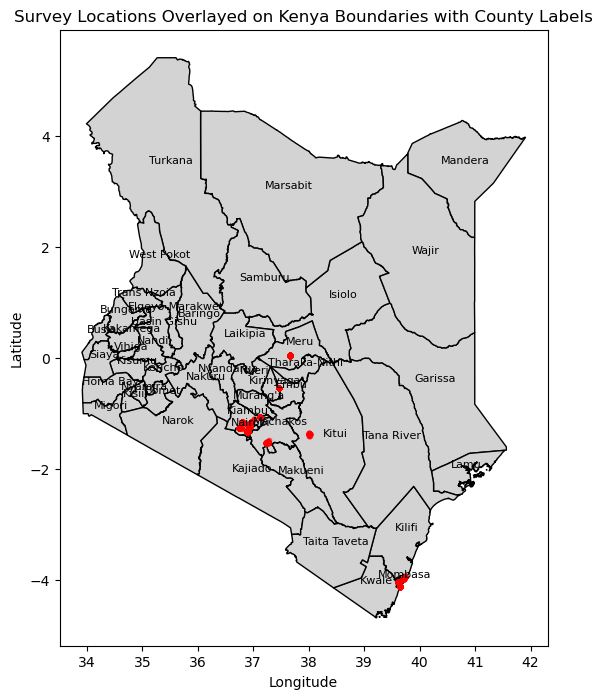

In [17]:
#Conduct Geospatial Data Analysis to further check data quality

#Load Kenya boundaries map to use
kenya_boundary = gpd.read_file('C:/Users/moger/Downloads/Data_Cleaning_Project/ken_adm_iebc_20191031_shp/ken_admbnda_adm1_iebc_20191031.shp')
# Check the CRS of Kenya boundary data
print("CRS of Kenya boundary data:", kenya_boundary.crs)
print(kenya_boundary.columns)
#Create a variable to hold the latitude and longitude of survey locations
lat_long=df[['_Record your current location_longitude','_Record your current location_latitude']]
# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(lat_long['_Record your current location_longitude'], lat_long['_Record your current location_latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# Plot the counties with labels and overlay the survey locations
fig, ax = plt.subplots(figsize=(10, 8))

# Plot counties with labels
for idx, row in kenya_boundary.iterrows():
    ax.annotate(text=row['ADM1_EN'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(3, 3), textcoords="offset points", ha='center', fontsize=8)

kenya_boundary.plot(ax=ax, color='lightgrey', edgecolor='black')

# Overlay survey locations
gdf.plot(ax=ax, color='red', markersize=10, alpha=0.5)

# Set plot title and labels
plt.title('Survey Locations Overlayed on Kenya Boundaries with County Labels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Show the plot
plt.show()

#Looks good, although while the survye shows that some of the respondents were from Kilifi, in the map the gps indicates otherwise,
#also, some locations outside those in the specified study counties appear in the map, such as Murang'a

#This should be a potential flag! However, since the data is already collected, this might not be most useful at this point, this would have 
#helped in the event that high frequency checked were performed during the data collection


That is the end of the data cleaning phase. I will need to investigate if there any differences in outcomes of the analysis, when I use say data containing only surveys done under 2 hours versus the whole data set. For instance, when checking if there is any significant difference in reported monthly food expenditure, weekly fruit & vegetable expenditure, and see if the outcome of anova test to check for significance of diiference between male-headed and female-headed houshold expnditures, changes based on the data used (surveys under 2 hours versus whole data set!)